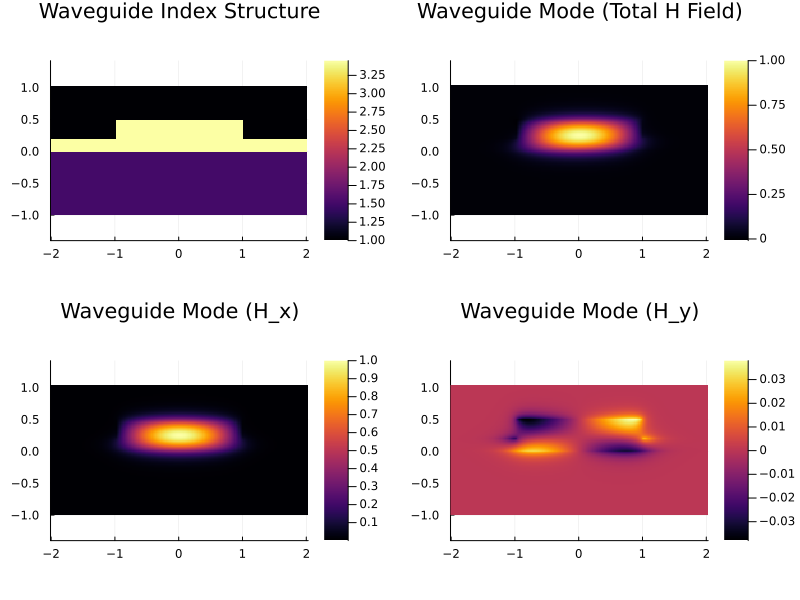

In [9]:
import WGMODES
import Plots

lambda = 1.55
dx = dy = 0.02
x = -2:dx:2
y = -1:dy:1
index = [y < 0 ? 1.5 : (y < 0.2 || (y < 0.5 && abs(x) < 1) ? 3.45 : 1.0) for y = y, x = x]
epsilon = index .^ 2
guess = maximum(index)
nmodes = 1
boundary = "0000"

hx, hy, neff = WGMODES.wgmodes(lambda, guess, nmodes, dx, dy, epsilon, boundary);

x = [x; x[end] + dx]
y = [y; y[end] + dy]

Plots.plot(
    Plots.heatmap(x, y, index,
        title="Waveguide Index Structure",
        aspectratio=1,
    ),
    Plots.heatmap(x, y, real.(hx[:, :, 1] .+ hy[:, :, 1]),
        title="Waveguide Mode (Total H Field)",
        aspectratio=1,
    ),
    Plots.heatmap(x, y, real.(hx[:, :, 1]),
        title="Waveguide Mode (H_x)",
        aspectratio=1,
    ),
    Plots.heatmap(x, y, real.(hy[:, :, 1]),
        title="Waveguide Mode (H_y)",
        aspectratio=1,
    ),
    size=(800, 600),
)


In [3]:
# 二次元配列として表示
println("Index matrix (refractive index distribution):")
for i in 1:size(index, 1)
    println(index[i, :])  # 各行を表示
end

Index matrix (refractive index distribution):
[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5